<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/supervised/logistic_regression/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 109.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


### Spis treści:
1. [Import bibliotek](#0)
2. [Regresja logistyczna (Logistic Regression) - wprowadzenie](#1)
3. [Załadowanie danych](#2)
4. [Podział danych na zbiór treningowy i testowy](#3)
5. [Przygotowanie danych do modelu](#4)
6. [Dopasowanie modelu](#5)
7. [Predykcja na podstawie modelu](#6)
8. [Ocena modelu](#7)

<a name='0'></a> Import bibliotek

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)
sklearn.__version__

'1.7.2'

<a name='1'></a> Regresja logistyczna (Logistic Regression) - wprowadzenie

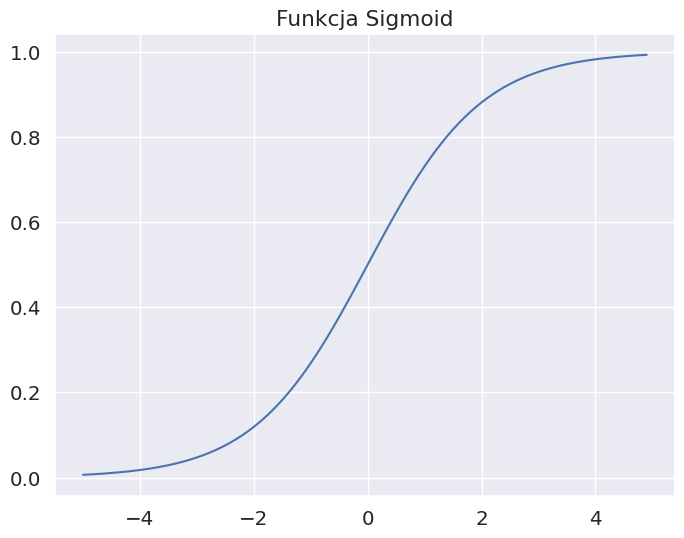

In [5]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

X=np.arange(-5,5,0.1)
y=sigmoid(X)


plt.figure(figsize=(8,6))
plt.plot(X,y)
plt.title('Funkcja Sigmoid')
plt.show()

<a name='2'></a> Załadowanie danych

In [6]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(raw_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'Rozmiar danych: {data.shape}')
print(f'Rozmiar etykiet: {target.shape}')

Rozmiar danych: (569, 30)
Rozmiar etykiet: (569,)


<a name='3'></a> Podział danych na zbiór treningowy i testowy

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'Rozmiar zbioru treningowego: {X_train.shape}')
print(f'Rozmiar zbioru testowego: {X_test.shape}')

print(f'Rozmiar zbioru treningowego y: {y_train.shape}')
print(f'Rozmiar zbioru testowego y: {y_test.shape}')

Rozmiar zbioru treningowego: (426, 30)
Rozmiar zbioru testowego: (143, 30)
Rozmiar zbioru treningowego y: (426,)
Rozmiar zbioru testowego y: (143,)


<a name='4'></a>Przygotowanie danych do modelu

In [11]:
X_train

array([[16.11, 18.05, 105.10, 813.00, 0.10, 0.11, 0.09, 0.06, 0.19, 0.06, ..., 19.92, 25.27, 129.00, 1233.00, 0.13, 0.22, 0.28, 0.12, 0.28, 0.08],
       [14.86, 16.94, 94.89, 673.70, 0.09, 0.07, 0.03, 0.03, 0.16, 0.06, ..., 16.31, 20.54, 102.30, 777.50, 0.12, 0.15, 0.12, 0.08, 0.25, 0.07],
       [16.60, 28.08, 108.30, 858.10, 0.08, 0.10, 0.09, 0.05, 0.16, 0.06, ..., 18.98, 34.12, 126.70, 1124.00, 0.11, 0.31, 0.34, 0.14, 0.22, 0.08],
       [11.54, 10.72, 73.73, 409.10, 0.09, 0.06, 0.01, 0.01, 0.18, 0.06, ..., 12.34, 12.87, 81.23, 467.80, 0.11, 0.16, 0.08, 0.05, 0.34, 0.07],
       [11.28, 13.39, 73.00, 384.80, 0.12, 0.11, 0.05, 0.05, 0.18, 0.06, ..., 11.92, 15.77, 76.53, 434.00, 0.14, 0.18, 0.09, 0.09, 0.21, 0.07],
       [16.17, 16.07, 106.30, 788.50, 0.10, 0.14, 0.07, 0.05, 0.20, 0.07, ..., 16.97, 19.14, 113.10, 861.50, 0.12, 0.26, 0.21, 0.13, 0.32, 0.09],
       [14.40, 26.99, 92.25, 646.10, 0.07, 0.05, 0.03, 0.02, 0.17, 0.05, ..., 15.40, 31.98, 100.40, 734.60, 0.10, 0.15, 0.15, 0

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[0.54, -0.31, 0.52, 0.42, 0.08, 0.16, 0.06, 0.26, 0.20, -0.03, ..., 0.73, -0.08, 0.62, 0.60, -0.03, -0.20, 0.03, 0.11, -0.15, -0.12],
       [0.19, -0.57, 0.10, 0.04, -0.51, -0.63, -0.70, -0.52, -0.84, -0.83, ..., -0.01, -0.85, -0.16, -0.19, -0.46, -0.63, -0.71, -0.52, -0.58, -0.84],
       [0.68, 1.98, 0.65, 0.55, -0.85, -0.05, 0.03, 0.10, -0.78, -0.91, ..., 0.54, 1.36, 0.55, 0.41, -0.82, 0.33, 0.31, 0.41, -1.07, -0.30],
       [-0.74, -1.99, -0.76, -0.70, -0.75, -0.84, -0.94, -1.02, 0.10, -0.25, ..., -0.82, -2.10, -0.78, -0.73, -1.03, -0.58, -0.89, -1.01, 0.81, -0.51],
       [-0.81, -1.38, -0.79, -0.77, 1.49, 0.16, -0.54, -0.03, -0.12, -0.29, ..., -0.91, -1.63, -0.91, -0.79, 0.21, -0.46, -0.87, -0.43, -1.25, -0.86],
       [0.56, -0.76, 0.56, 0.35, 0.20, 0.72, -0.29, 0.12, 0.67, 0.44, ..., 0.13, -1.08, 0.16, -0.05, -0.39, -0.01, -0.29, 0.16, 0.43, 0.31],
       [0.06, 1.73, -0.01, -0.04, -1.93, -0.98, -0.68, -0.81, -0.35, -1.22, ..., -0.19, 1.01, -0.22, -0.27, -1.37, -0.68, -

In [15]:
scaler.mean_

array([14.18, 19.42, 92.38, 660.94, 0.10, 0.11, 0.09, 0.05, 0.18, 0.06, 0.42, 1.22, 2.94, 41.88, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.34, 25.75, 107.78, 889.48, 0.13, 0.26, 0.27, 0.11, 0.29, 0.08])

In [17]:
scaler.scale_

array([3.56, 4.38, 24.67, 359.98, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.53, 2.17, 48.84, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.88, 6.14, 34.24, 576.75, 0.02, 0.16, 0.21, 0.07, 0.06, 0.02])

<a name='5'></a> Dopasowanie modelu

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<a name='6'></a> Predykcja na podstawie modelu

In [19]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [20]:
y_prob=log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.02, 0.98],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.10, 0.90],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.17, 0.83],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.12, 0.88],
       [0.02, 0.98],
       [0.05, 0.95],
       [1.00, 0.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.88, 0.12],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.52, 0.48],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00]])

<a name='7'></a>Ocena modelu

Accurancy: 0.972027972027972


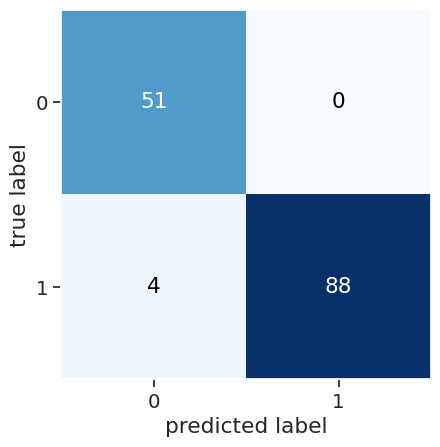

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)

print(f'Accurancy: {accuracy_score(y_test,y_pred)}')


In [25]:
def plot_confusion_matrix(cm):
  #klasyfikacja binarna
  cm=cm[::1]
  cm=pd.DataFrame(cm,columns=['pred_0','pred_1'], index=['true_0','true_1'])

  fig=ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                  colorscale='ice',showscale=True,reversescale=True)
  fig.update_layout(width=500, height=500,title='Confusion Matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.96      0.98        92

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

